In [1]:
# import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
pd.options.mode.chained_assignment = None

# Load Datasets

In [2]:
# load application dataset

app_data = pd.read_csv("datasets/application_record.csv")

In [3]:
# load credit dataset

credit_data = pd.read_csv("datasets/credit_record.csv")

# Application Records EDA

In [4]:
app_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [5]:
app_data.shape

(438557, 18)

In [6]:
app_data.isnull().sum()

# occupation column has a lot

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [7]:
# check for duplicated records

app_data[app_data.duplicated()]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS


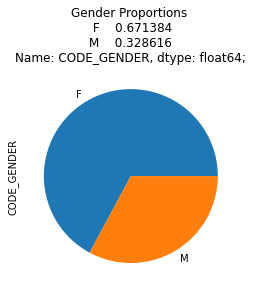

In [8]:
# gender proportions

gender_val = app_data.CODE_GENDER.value_counts(normalize = True)
gender_val.plot.pie()
ax = plt.title('Gender Proportions \n {};'.format(gender_val))
plt.show()

# 67.14% of the applicants are females

In [9]:
# Home Ownerships by Gender

home_ownership_count = app_data.groupby(['CODE_GENDER', 'NAME_HOUSING_TYPE']).agg({'ID': 'count'})
home_ownership_count

ID
CODE_GENDER NAME_HOUSING_TYPE          
F           Co-op apartment         862
            House / apartment    267607
            Municipal apartment   10019
            Office apartment       2122
            Rented apartment       3284
            With parents          10546
M           Co-op apartment         677
            House / apartment    126224
            Municipal apartment    4195
            Office apartment       1800
            Rented apartment       2690
            With parents           8531

In [10]:
# Home Ownership in %

home_ownership_percent = home_ownership_count.groupby(level = 0).apply(lambda x:100 * x / float(x.sum()))
home_ownership_percent

ID
CODE_GENDER NAME_HOUSING_TYPE             
F           Co-op apartment       0.292759
            House / apartment    90.886768
            Municipal apartment   3.402731
            Office apartment      0.720690
            Rented apartment      1.115338
            With parents          3.581714
M           Co-op apartment       0.469757
            House / apartment    87.584393
            Municipal apartment   2.910829
            Office apartment      1.248985
            Rented apartment      1.866539
            With parents          5.919496

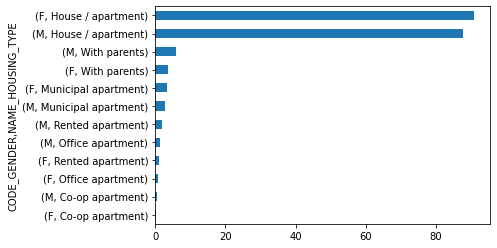

In [11]:
# plot horizontal bar chart for home ownership

home_ownership_percent.sort_values(by = 'ID').plot.barh()
plt.gca().get_legend().remove()
plt.show()

# higher home ownership % for females than males

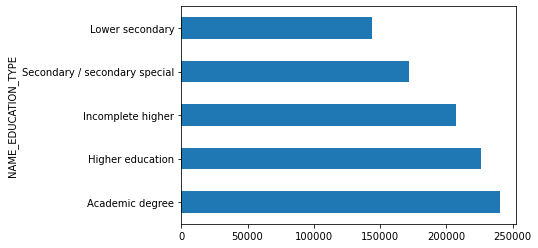

In [12]:
# education level and income relation

app_data.groupby(["NAME_EDUCATION_TYPE"]).AMT_INCOME_TOTAL.mean().sort_values(ascending=False).plot.barh()
plt.show()

# income increases as education level does

# Credit Records EDA

In [13]:
credit_data.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [14]:
credit_data.shape

(1048575, 3)

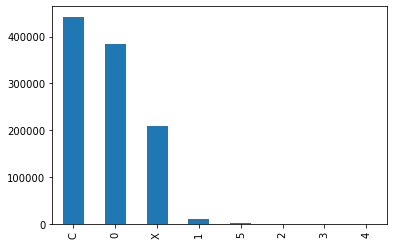

In [15]:
# status distribution

credit_data.STATUS.value_counts().plot.bar()
plt.show()

In [16]:
# find out for how long each customer has had a card

credit_data['MONTHS_BALANCE'] = credit_data.MONTHS_BALANCE.apply(lambda x : x*(-1))
cardholder_tenure = pd.DataFrame(credit_data.groupby('ID').agg({'MONTHS_BALANCE' : max}))
cardholder_tenure.rename(columns = {'MONTHS_BALANCE':'CUST_FOR_MONTHS'}, inplace = True)
cardholder_tenure.head()

,CUST_FOR_MONTHS
ID,
5001711,3
5001712,18
5001713,21
5001714,14
5001715,59


# Merging Modified Credit & Application Records

In [17]:
# merge application and credit records to get the number of months for which customer has had a card

cust_data = pd.merge(app_data, cardholder_tenure, on = 'ID', how = 'inner')
cust_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUST_FOR_MONTHS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,15
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,14
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,29
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,4
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,26


In [18]:
cust_data.shape

(36457, 19)

In [19]:
# change status of "C" and "X" to -1 as they have either paid off or have no loan for that month

credit_data['STATUS'][credit_data["STATUS"] == 'C'] = -1
credit_data['STATUS'][credit_data["STATUS"] == 'X'] = -1
credit_data.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,-1
1,5001711,1,0
2,5001711,2,0
3,5001711,3,0
4,5001712,0,-1


In [20]:
credit_data['STATUS'] = credit_data.STATUS.apply(lambda x : int(x))

In [21]:
# drop duplicates

credit_data.sort_values(by = 'STATUS', ascending = False, inplace = True)
credit_data.drop_duplicates(subset = ['ID'], inplace = True)
credit_data.shape

(45985, 3)

In [22]:
# assuming that after 30 days of payment withstanding, customers are defaulters
# hence, status >= 1 will be considered as so

credit_data['target'] = credit_data.STATUS.apply(lambda x : 1 if x>=1 else 0)
credit_data.drop(['STATUS', 'MONTHS_BALANCE'], axis = 1, inplace = True)
credit_data.head()

,ID,target
372050,5042064,1
307952,5029028,1
723708,5097065,1
942335,5135344,1
832456,5117313,1


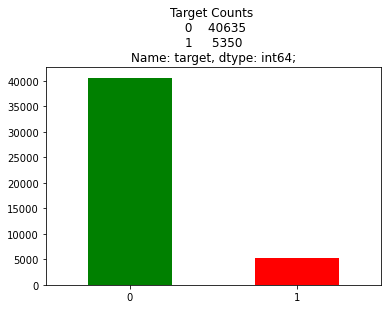

In [23]:
default_val = credit_data.target.value_counts()
default_val.plot.bar(color = ["green", "red"])
ax = plt.title('Target Counts \n {};'.format(default_val))
plt.xticks(rotation = 0)
plt.show()

In [24]:
merged = pd.merge(cust_data, credit_data, on = "ID", how = "inner")
merged.shape

(36457, 20)

In [25]:
merged.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUST_FOR_MONTHS,target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,15,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,14,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,29,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,4,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,26,0


In [26]:
# drop duplicated values

merged.drop_duplicates(subset = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'CUST_FOR_MONTHS',
       'target'], inplace = True)
merged.shape

(32595, 20)

## Merged Records EDA

**Credit records on Income Type**

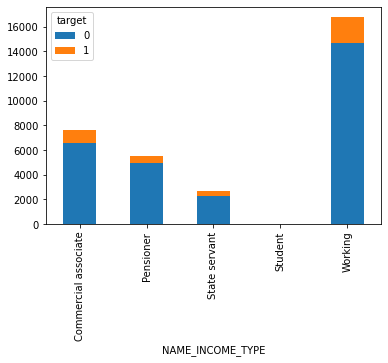

In [27]:
cr_income = merged.groupby(["NAME_INCOME_TYPE"]).target.value_counts().unstack()
cr_income.plot(kind = 'bar', stacked=True)
plt.show()

**Defaulters by Occupational Type**

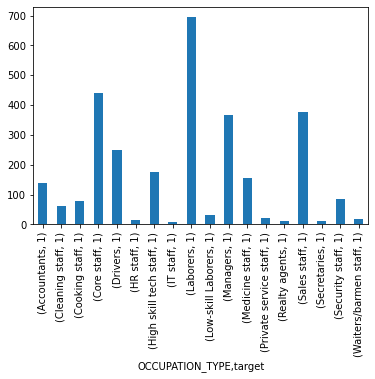

In [28]:
d_occupational_type = merged[merged.target == 1].groupby("OCCUPATION_TYPE").target.value_counts()
d_occupational_type.plot(kind = 'bar')
plt.show()

**Defaulters by AMT_INCOME_TOTAL Type**

In [29]:
print(merged["AMT_INCOME_TOTAL"].min())
print(merged["AMT_INCOME_TOTAL"].max())

27000.0
1575000.0


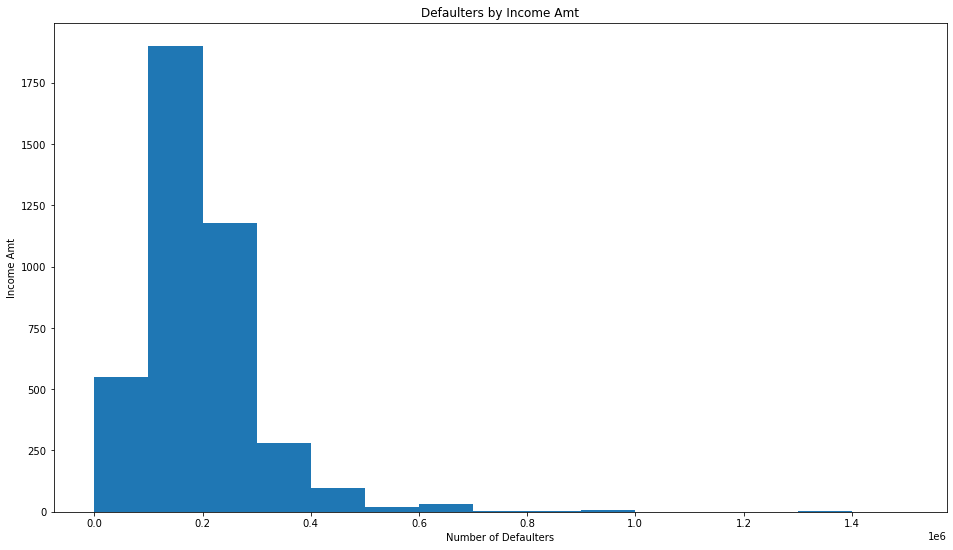

In [30]:
plt.figure(figsize=(16,9))
#normal
plt.hist(merged[merged.target == 1]["AMT_INCOME_TOTAL"], stacked=True, bins =range(0,1600000,100000))
#To see the smaller values, Log=True
# plt.hist(modified[modified.target == 1]["AMT_INCOME_TOTAL"], stacked=True, bins =range(0,1600000,100000),log=True)
#stacked histo
# plt.hist([modified[modified.target == 1]["AMT_INCOME_TOTAL"],modified[modified.target == 0]["AMT_INCOME_TOTAL"]],  stacked=True,bins =range(0,1600000,100000))

plt.title("Defaulters by Income Amt")
plt.xlabel("Number of Defaulters")
plt.ylabel("Income Amt")
plt.show()

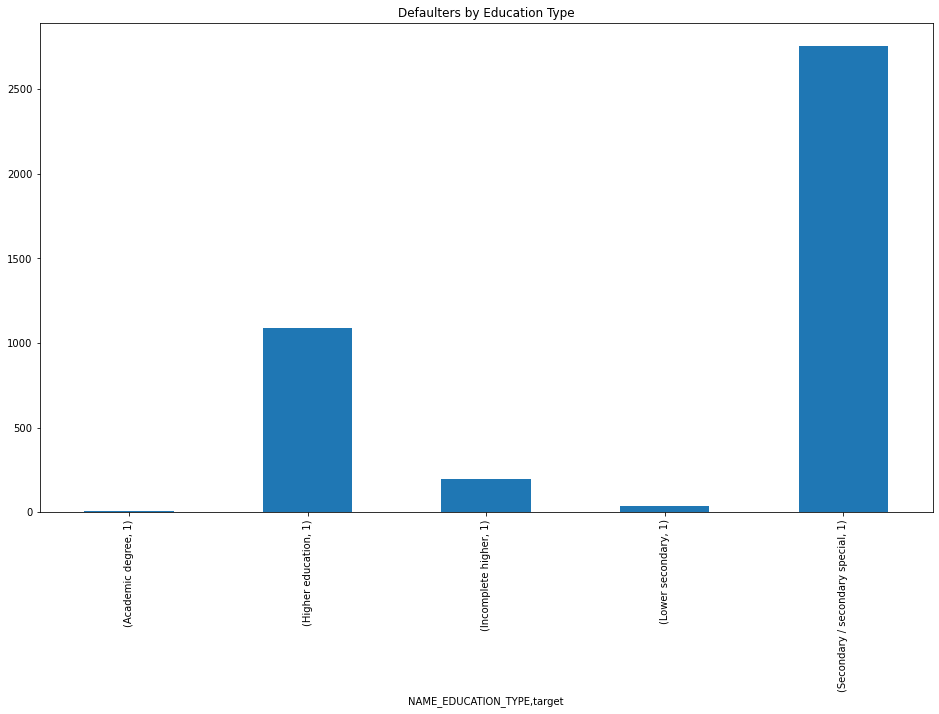

In [31]:
d_education_type = merged[merged.target == 1].groupby("NAME_EDUCATION_TYPE").target.value_counts()
d_education_type.plot(kind='bar', figsize=(16,9),title="Defaulters by Education Type")
plt.show()

## Further Preprocessing for Merged Records

In [32]:
# drop ID since it provides no value

merged.drop("ID", axis = 1, inplace = True)

In [33]:
merged.isnull().sum()

CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
FLAG_MOBIL                 0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        10096
CNT_FAM_MEMBERS            0
CUST_FOR_MONTHS            0
target                     0
dtype: int64

In [34]:
# there are many null values for OCCUPATION_TYPE, hence we will assume that if null, the person is unemployed

merged['OCCUPATION_TYPE'] = merged.OCCUPATION_TYPE.apply(lambda x : 'UNEMPLOYED' if pd.isnull(x) else x)

In [35]:
# check to see if anymore null records

merged.isnull().sum()

CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
CUST_FOR_MONTHS        0
target                 0
dtype: int64

In [36]:
# convert binary categorical columns

merged['CODE_GENDER'] = merged.CODE_GENDER.apply(lambda x : 0 if x == 'M' else 1)
merged['FLAG_OWN_CAR'] = merged.FLAG_OWN_CAR.apply(lambda x : 0 if x == 'N' else 1)
merged['FLAG_OWN_REALTY'] = merged.FLAG_OWN_REALTY.apply(lambda x : 0 if x == 'N' else 1)
merged.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUST_FOR_MONTHS,target
0,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,UNEMPLOYED,2.0,15,1
1,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,UNEMPLOYED,2.0,14,1
2,0,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,29,0
3,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,4,0
4,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,26,0


In [37]:
merged.FLAG_MOBIL.value_counts()

1    32595
Name: FLAG_MOBIL, dtype: int64

In [38]:
# since all rows have FLAG_MOBIL as 1, there isn't much value add and it will be dropped

merged.drop("FLAG_MOBIL", axis = 1, inplace = True)

In [39]:
# convert CNT_FAM_MEMBERS to integer

merged['CNT_FAM_MEMBERS'] = merged['CNT_FAM_MEMBERS'].astype('int')
merged.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUST_FOR_MONTHS,target
0,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,UNEMPLOYED,2,15,1
1,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,UNEMPLOYED,2,14,1
2,0,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2,29,0
3,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1,4,0
4,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1,26,0


In [40]:
# since both DAYS_BIRTH and DAYS_EMPLOYED are backwards counted, we need to make them positive

merged["DAYS_BIRTH"] = merged["DAYS_BIRTH"].apply(lambda x : x*-1)
merged["DAYS_EMPLOYED"] = merged["DAYS_EMPLOYED"].apply(lambda x : x*-1)
merged.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUST_FOR_MONTHS,target
0,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,12005,4542,1,0,0,UNEMPLOYED,2,15,1
1,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,12005,4542,1,0,0,UNEMPLOYED,2,14,1
2,0,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,21474,1134,0,0,0,Security staff,2,29,0
3,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,0,1,1,Sales staff,1,4,0
4,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,0,1,1,Sales staff,1,26,0


In [41]:
# convert days to years

merged["EMP_YEARS"] = merged.DAYS_EMPLOYED / 365
merged["AGE"] = merged.DAYS_BIRTH / 365
merged.drop(["DAYS_BIRTH","DAYS_EMPLOYED"], axis = 1, inplace = True)
merged.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUST_FOR_MONTHS,target,EMP_YEARS,AGE
0,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,UNEMPLOYED,2,15,1,12.443836,32.890411
1,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,UNEMPLOYED,2,14,1,12.443836,32.890411
2,0,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Security staff,2,29,0,3.106849,58.832877
3,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1,4,0,8.358904,52.356164
4,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1,26,0,8.358904,52.356164


In [42]:
# assume that if EMP_YEARS < 0, they are pensioners, hence change EMP_YEARS to -1 for them

merged['EMP_YEARS'] = merged.EMP_YEARS.apply(lambda x : -1 if x<0 else x)

# Classification Models

In [43]:
from sklearn.metrics import classification_report

In [44]:
# create deep copy of merged so that it doesn't affect the original merged copy

merged_for_predictions = merged.copy()
merged_for_predictions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32595 entries, 0 to 36456
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CODE_GENDER          32595 non-null  int64  
 1   FLAG_OWN_CAR         32595 non-null  int64  
 2   FLAG_OWN_REALTY      32595 non-null  int64  
 3   CNT_CHILDREN         32595 non-null  int64  
 4   AMT_INCOME_TOTAL     32595 non-null  float64
 5   NAME_INCOME_TYPE     32595 non-null  object 
 6   NAME_EDUCATION_TYPE  32595 non-null  object 
 7   NAME_FAMILY_STATUS   32595 non-null  object 
 8   NAME_HOUSING_TYPE    32595 non-null  object 
 9   FLAG_WORK_PHONE      32595 non-null  int64  
 10  FLAG_PHONE           32595 non-null  int64  
 11  FLAG_EMAIL           32595 non-null  int64  
 12  OCCUPATION_TYPE      32595 non-null  object 
 13  CNT_FAM_MEMBERS      32595 non-null  int32  
 14  CUST_FOR_MONTHS      32595 non-null  int64  
 15  target               32595 non-null 

In [45]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# label tracker for reference
labels_dict = {}
for feature in merged_for_predictions:
    if merged_for_predictions[feature].dtypes == "object":
        new_encoded_column = f"{feature}_ENCODED"
        merged_for_predictions[new_encoded_column] = le.fit_transform(merged_for_predictions[feature])
        temp_df = merged_for_predictions.drop_duplicates(feature).set_index(feature)
        temp_dict = temp_df.to_dict()
        labels_dict[feature] = temp_dict[new_encoded_column]
        merged_for_predictions.drop([feature], axis = 1, inplace = True)
        
merged_for_predictions.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CUST_FOR_MONTHS,target,EMP_YEARS,AGE,NAME_INCOME_TYPE_ENCODED,NAME_EDUCATION_TYPE_ENCODED,NAME_FAMILY_STATUS_ENCODED,NAME_HOUSING_TYPE_ENCODED,OCCUPATION_TYPE_ENCODED
0,0,1,1,0,427500.0,1,0,0,2,15,1,12.443836,32.890411,4,1,0,4,17
1,0,1,1,0,427500.0,1,0,0,2,14,1,12.443836,32.890411,4,1,0,4,17
2,0,1,1,0,112500.0,0,0,0,2,29,0,3.106849,58.832877,4,4,1,1,16
3,1,0,1,0,270000.0,0,1,1,1,4,0,8.358904,52.356164,0,4,3,1,14
4,1,0,1,0,270000.0,0,1,1,1,26,0,8.358904,52.356164,0,4,3,1,14


In [46]:
labels_dict

{'NAME_INCOME_TYPE': {'Working': 4,
  'Commercial associate': 0,
  'Pensioner': 1,
  'State servant': 2,
  'Student': 3},
 'NAME_EDUCATION_TYPE': {'Higher education': 1,
  'Secondary / secondary special': 4,
  'Incomplete higher': 2,
  'Lower secondary': 3,
  'Academic degree': 0},
 'NAME_FAMILY_STATUS': {'Civil marriage': 0,
  'Married': 1,
  'Single / not married': 3,
  'Separated': 2,
  'Widow': 4},
 'NAME_HOUSING_TYPE': {'Rented apartment': 4,
  'House / apartment': 1,
  'Municipal apartment': 2,
  'With parents': 5,
  'Co-op apartment': 0,
  'Office apartment': 3},
 'OCCUPATION_TYPE': {'UNEMPLOYED': 17,
  'Security staff': 16,
  'Sales staff': 14,
  'Accountants': 0,
  'Laborers': 8,
  'Managers': 10,
  'Drivers': 4,
  'Core staff': 3,
  'High skill tech staff': 6,
  'Cleaning staff': 1,
  'Private service staff': 12,
  'Cooking staff': 2,
  'Low-skill Laborers': 9,
  'Medicine staff': 11,
  'Secretaries': 15,
  'Waiters/barmen staff': 18,
  'HR staff': 5,
  'Realty agents': 13,
 

**Train Test Split**

In [47]:
X = merged_for_predictions.drop(["target"], axis=1)
y = merged_for_predictions["target"]

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

**Scaling**

In [49]:
# since features are of different ranges, we will scale

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_scaled = pd.DataFrame(mms.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(mms.transform(X_test), columns = X_test.columns)

**SMOTE**

In [50]:
# !pip install --user imblearn

In [51]:
# to address imbalances in the dataset

from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_balanced, y_balanced = oversample.fit_resample(X_scaled, y_train)
X_test_balanced, y_test_balanced = oversample.fit_resample(X_test_scaled, y_test)

### XGBoost

In [52]:
from xgboost import XGBClassifier

In [53]:
xgb = XGBClassifier(use_label_encoder = False, eval_metric = "logloss")
xgb.fit(X_balanced, y_balanced)
train_score = xgb.score(X_balanced, y_balanced)
test_score = xgb.score(X_test_balanced, y_test_balanced)
xgb_pred = xgb.predict(X_test_balanced)
print(train_score)
print(test_score)

0.9386558412268832
0.9155472491531363


In [54]:
print(classification_report(y_test_balanced, xgb_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      8561
           1       0.98      0.85      0.91      8561

    accuracy                           0.92     17122
   macro avg       0.92      0.92      0.92     17122
weighted avg       0.92      0.92      0.92     17122



### Random Forest

In [60]:
print('Training Features Shape:', X_balanced.shape)
print('Training Labels Shape:', y_balanced.shape)
print('Testing Features Shape:', X_test_balanced.shape)
print('Testing Labels Shape:', y_test_balanced.shape)

Training Features Shape: (39906, 17)
Training Labels Shape: (39906,)
Testing Features Shape: (17122, 17)
Testing Labels Shape: (17122,)


In [74]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Instantiate model with 1000 decision trees, base on the gridsearch best hyperpermeter
rf = RandomForestClassifier(n_estimators= 1000, max_depth= 100, max_features= 3, min_samples_leaf= 3, min_samples_split= 8, bootstrap= True)

# Train the model on training data
rf.fit(X_balanced, y_balanced);

In [79]:
strat_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use the forest's predict method on the test data
predictions = rf.predict(X_test_balanced)

# Calculate the absolute errors
errors = abs(predictions - y_test_balanced)

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test_balanced)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)


train_adjusted_r2 = 1 - (1-rf.score(X_balanced, y_balanced)) * (len(y)-1)/(len(y)-X.shape[1]-1)
test_adjusted_r2 = 1 - (1-rf.score(X_test_balanced, y_test_balanced)) * (len(y)-1)/(len(y)-X.shape[1]-1)
print("Evaluation Metrics for Random Forest Regression")
print(f"MAE: {mean_absolute_error(y_test_balanced, predictions)}")
print(f"MSE: {mean_squared_error(y_test_balanced, predictions)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_balanced, predictions))}")
print(f"R-squared score for train: {rf.score(X_balanced, y_balanced)}")
print(f"Adjusted R-squared score for train: {train_adjusted_r2}")
print(f"R-squared score for test: {rf.score(X_test_balanced, y_test_balanced)}")
print(f"Adjusted R-squared score for test: {test_adjusted_r2}")
print(f"Cross Validation Score: {round(np.mean(cross_val_score(rf, X, y, cv=strat_k_fold)), 4)}")                
# print('Accuracy:', round(accuracy, 2), '%.')


Evaluation Metrics for Random Forest Regression
MAE: 0.17702371218315618
MSE: 0.17702371218315618
RMSE: 0.42074185931893704
R-squared score for train: 0.9578760086202576
Adjusted R-squared score for train: 0.9578540266129071
R-squared score for test: 0.8229762878168438
Adjusted R-squared score for test: 0.8228839096633271
Cross Validation Score: 0.8771


In [80]:
print(classification_report(y_test_balanced, rf_pred))

              precision    recall  f1-score   support

           0       0.76      0.95      0.84      8561
           1       0.94      0.69      0.80      8561

    accuracy                           0.82     17122
   macro avg       0.85      0.82      0.82     17122
weighted avg       0.85      0.82      0.82     17122



In [81]:
#with stratifiedkfold = 3 #using cvfold = 3 parameters
rf = RandomForestClassifier(n_estimators= 300, max_depth= 90, max_features= 3, min_samples_leaf= 3, min_samples_split= 8, bootstrap= True)

rf.fit(X_balanced, y_balanced)
rf_pred = rf.predict(X_test_balanced)

print("Evaluation Metrics for Random Forest Regression")
print(f"MAE: {mean_absolute_error(y_test_balanced, rf_pred)}")
print(f"MSE: {mean_squared_error(y_test_balanced, rf_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_balanced, rf_pred))}")
print(f"R-squared score for train: {rf.score(X_balanced, y_balanced)}")
print(f"R-squared score for test: {rf.score(X_test_balanced, y_test_balanced)}")
print(f"Cross Validation Score: {round(np.mean(cross_val_score(rf, X_balanced, y_balanced, cv=strat_k_fold)), 4)}")

Evaluation Metrics for Random Forest Regression
MAE: 0.17252657399836469
MSE: 0.17252657399836469
RMSE: 0.4153631832485454
R-squared score for train: 0.9583270686112364
R-squared score for test: 0.8274734260016353
Cross Validation Score: 0.9109


In [82]:
print(classification_report(y_test_balanced, rf_pred))

              precision    recall  f1-score   support

           0       0.76      0.95      0.85      8561
           1       0.93      0.70      0.80      8561

    accuracy                           0.83     17122
   macro avg       0.85      0.83      0.82     17122
weighted avg       0.85      0.83      0.82     17122



### Neural Network

In [89]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
NN_model = Sequential()
# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = 17, activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history=NN_model.fit(X_balanced, y_balanced, epochs=20, batch_size=5, validation_split=0.2)


Epoch 1/20
6385/6385 [==============================] - 24s 4ms/step - loss: 5.7840 - accuracy: 0.6250 - val_loss: 15.4250 - val_accuracy: 0.0000e+00
Epoch 2/20
6385/6385 [==============================] - 20s 3ms/step - loss: 5.7840 - accuracy: 0.6250 - val_loss: 15.4250 - val_accuracy: 0.0000e+00
Epoch 3/20
6385/6385 [==============================] - 22s 3ms/step - loss: 5.7840 - accuracy: 0.6250 - val_loss: 15.4250 - val_accuracy: 0.0000e+00
Epoch 4/20
6385/6385 [==============================] - 22s 3ms/step - loss: 5.7840 - accuracy: 0.6250 - val_loss: 15.4250 - val_accuracy: 0.0000e+00
Epoch 5/20
6385/6385 [==============================] - 22s 3ms/step - loss: 5.7840 - accuracy: 0.6250 - val_loss: 15.4250 - val_accuracy: 0.0000e+00
Epoch 6/20
6385/6385 [==============================] - 22s 3ms/step - loss: 5.7840 - accuracy: 0.6250 - val_loss: 15.4250 - val_accuracy: 0.0000e+00
Epoch 7/20
6385/6385 [==============================] - 23s 4ms/step - loss: 5.7840 - accuracy: 0.62

In [96]:
predictions = NN_model.predict(X_test_balanced)
predictions_classes = np.argmax(predictions, axis=-1)


In [98]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test_balanced, predictions_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test_balanced, predictions_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test_balanced, predictions_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_balanced, predictions_classes)
print('F1 score: %f' % f1)

Accuracy: 0.500000
Precision: 0.000000
Recall: 0.000000
F1 score: 0.000000


C:\Users\wei-d\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


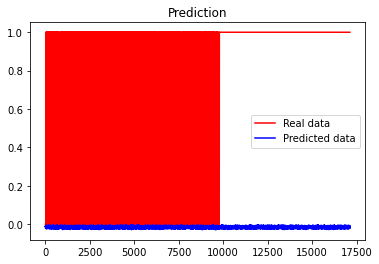

In [100]:
plt.plot(y_test_balanced,  color = 'red', label = 'Real data')
plt.plot(predictions,  color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [85]:
# !pip install keras

In [87]:
# !pip install tensorflow

  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached rsa-4.8-py3-none-any.whl (39 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=b410feee1b2266cd3481e817397fef61a2419d5dde13a2ab56e7c924c4dbdc8c
  Stored in directory: c:\users\wei-d\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.10.0
    Uninstalling importlib-metadata-3.10.0:
      Successfully uninstalled importlib-metadata-3.10.0


# Calculation of WOE and IV (to be refined later)

In [43]:
def calc_woe_iv(col) :
    df = pd.DataFrame(columns = ['values','total','good','bad','event_rate','non_event_rate','per_total_events','per_total_non_events','WOE','IV'])
    df['values'] = merged[col].unique()
    df.set_index('values', inplace = True)
    
    values = merged[col].unique()
    total_dict = dict(merged.groupby(col).size())
    col_target_dict = dict(merged.groupby([col,'target']).size())
    target_count = dict(merged.groupby(['target']).size())
    
    for value in values :
        df.loc[value]['total'] = total_dict[value]
        if (value,1) in col_target_dict:
            df.loc[value]['good'] = col_target_dict[(value,1)]
        else :
            df.loc[value]['good'] = 0
        
        if (value,0) in col_target_dict:
            df.loc[value]['bad'] = col_target_dict[(value,0)]
        else :
            df.loc[value]['bad'] = 0
            
        if df.loc[value]['bad'] == 0 :
            df = df.drop([value])
        
    df['event_rate'] = df['good']/df['total']
    df['non_event_rate'] = df['bad']/df['total']
    
    df['per_total_events'] = df['good']/target_count[1]
    df['per_total_non_events'] = df['bad']/target_count[0]
    
    df['WOE'] = np.log(df.per_total_events.astype('float64')/df.per_total_non_events.astype('float64'))
    df['IV'] = (df['per_total_events'] - df['per_total_non_events']) * df['WOE']
    
    return df

In [46]:
iv_values = pd.DataFrame(columns = ['col_name','iv_value'])
iv_values['col_name'] = merged.columns
iv_values.set_index(['col_name'], inplace = True)
iv_values.drop(['target'], inplace = True)
iv_values

,iv_value
col_name,
CODE_GENDER,NaN
FLAG_OWN_CAR,NaN
FLAG_OWN_REALTY,NaN
CNT_CHILDREN,NaN
AMT_INCOME_TOTAL,NaN
NAME_INCOME_TYPE,NaN
NAME_EDUCATION_TYPE,NaN
NAME_FAMILY_STATUS,NaN
NAME_HOUSING_TYPE,NaN


## Binary Variables

In [47]:
CODE_GENDER_df = calc_woe_iv('CODE_GENDER')
iv_values.loc['CODE_GENDER'] = CODE_GENDER_df.IV.sum()
print(iv_values.loc['CODE_GENDER'])
CODE_GENDER_df

iv_value    0.00325509
Name: CODE_GENDER, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
0,10794,1448,9346,0.134149,0.865851,0.354815,0.327769,0.079288,0.00214444
1,21801,2633,19168,0.120774,0.879226,0.645185,0.672231,-0.041065,0.00111066


In [48]:
FLAG_OWN_CAR_df = calc_woe_iv('FLAG_OWN_CAR')
iv_values.loc['FLAG_OWN_CAR'] = FLAG_OWN_CAR_df.IV.sum()
print(iv_values.loc['FLAG_OWN_CAR'])
FLAG_OWN_CAR_df

iv_value    0.00141387
Name: FLAG_OWN_CAR, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
1,12355,1482,10873,0.119951,0.880049,0.363146,0.381321,-0.048837,0.00088762
0,20240,2599,17641,0.128409,0.871591,0.636854,0.618679,0.028954,0.000526247


In [49]:
FLAG_OWN_REALTY_df = calc_woe_iv('FLAG_OWN_REALTY')
iv_values.loc['FLAG_OWN_REALTY'] = FLAG_OWN_REALTY_df.IV.sum()
print(iv_values.loc['FLAG_OWN_REALTY'])
FLAG_OWN_REALTY_df

iv_value    0.00743377
Name: FLAG_OWN_REALTY, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
1,21870,2592,19278,0.118519,0.881481,0.635138,0.676089,-0.062482,0.00255865
0,10725,1489,9236,0.138834,0.861166,0.364862,0.323911,0.119049,0.00487512


In [50]:
FLAG_WORK_PHONE_df = calc_woe_iv('FLAG_WORK_PHONE')
iv_values.loc['FLAG_WORK_PHONE'] = FLAG_WORK_PHONE_df.IV.sum()
print(iv_values.loc['FLAG_WORK_PHONE'])
FLAG_WORK_PHONE_df

iv_value    0.000138836
Name: FLAG_WORK_PHONE, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
1,7351,938,6413,0.127602,0.872398,0.229846,0.224907,0.021721,0.000107269
0,25244,3143,22101,0.124505,0.875495,0.770154,0.775093,-0.006392,3.15671e-05


In [51]:
FLAG_PHONE_df = calc_woe_iv('FLAG_PHONE')
iv_values.loc['FLAG_PHONE'] = FLAG_PHONE_df.IV.sum()
print(iv_values.loc['FLAG_PHONE'])
FLAG_PHONE_df

iv_value    0.000215304
Name: FLAG_PHONE, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
0,22980,2901,20079,0.12624,0.87376,0.710855,0.70418,0.009434,6.29709e-05
1,9615,1180,8435,0.122725,0.877275,0.289145,0.29582,-0.022822,0.000152333


In [52]:
FLAG_EMAIL_df = calc_woe_iv('FLAG_EMAIL')
iv_values.loc['FLAG_EMAIL'] = FLAG_EMAIL_df.IV.sum()
print(iv_values.loc['FLAG_EMAIL'])
FLAG_EMAIL_df

iv_value    0.00252827
Name: FLAG_EMAIL, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
0,29654,3660,25994,0.123423,0.876577,0.896839,0.911622,-0.016349,0.0002417
1,2941,421,2520,0.143149,0.856851,0.103161,0.0883776,0.154672,0.00228657


## Categorical Variables

In [53]:
NAME_INCOME_TYPE_df = calc_woe_iv('NAME_INCOME_TYPE')
iv_values.loc['NAME_INCOME_TYPE'] = NAME_INCOME_TYPE_df.IV.sum()
print(iv_values.loc['NAME_INCOME_TYPE'])
NAME_INCOME_TYPE_df

iv_value    0.00601162
Name: NAME_INCOME_TYPE, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
Working,16786,2069,14717,0.123257,0.876743,0.506984,0.516132,-0.017885,0.000163625
Commercial associate,7593,1029,6564,0.13552,0.86448,0.252144,0.230203,0.091040,0.00199755
Pensioner,5537,616,4921,0.111252,0.888748,0.150943,0.172582,-0.133967,0.00289884
State servant,2669,366,2303,0.13713,0.86287,0.0896839,0.0807673,0.104719,0.000933729
Student,10,1,9,0.1,0.9,0.000245038,0.000315634,-0.253171,1.7873e-05


In [54]:
NAME_EDUCATION_TYPE_df = calc_woe_iv('NAME_EDUCATION_TYPE')
iv_values.loc['NAME_EDUCATION_TYPE'] = NAME_EDUCATION_TYPE_df.IV.sum()
print(iv_values.loc['NAME_EDUCATION_TYPE'])
NAME_EDUCATION_TYPE_df

iv_value    0.00340755
Name: NAME_EDUCATION_TYPE, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
Higher education,8776,1091,7685,0.124316,0.875684,0.267336,0.269517,-0.008123,1.77095e-05
Secondary / secondary special,22191,2753,19438,0.124059,0.875941,0.67459,0.6817,-0.010486,7.45591e-05
Incomplete higher,1264,195,1069,0.154272,0.845728,0.0477824,0.0374904,0.242574,0.00249658
Lower secondary,337,36,301,0.106825,0.893175,0.00882137,0.0105562,-0.179538,0.000311472
Academic degree,27,6,21,0.222222,0.777778,0.00147023,0.00073648,0.691290,0.000507232


In [55]:
NAME_FAMILY_STATUS_df = calc_woe_iv('NAME_FAMILY_STATUS')
iv_values.loc['NAME_FAMILY_STATUS'] = NAME_FAMILY_STATUS_df.IV.sum()
print(iv_values.loc['NAME_FAMILY_STATUS'])
NAME_FAMILY_STATUS_df

iv_value    0.00313229
Name: NAME_FAMILY_STATUS, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
Civil marriage,2652,348,2304,0.131222,0.868778,0.0852732,0.0808024,0.053854,0.000240769
Married,22370,2772,19598,0.123916,0.876084,0.679245,0.687311,-0.011805,9.52241e-05
Single / not married,4315,592,3723,0.137196,0.862804,0.145062,0.130567,0.105275,0.00152596
Separated,1882,216,1666,0.114772,0.885228,0.0529282,0.0584274,-0.098849,0.000543595
Widow,1376,153,1223,0.111192,0.888808,0.0374908,0.0428912,-0.134571,0.000726738


In [56]:
NAME_HOUSING_TYPE_df = calc_woe_iv('NAME_HOUSING_TYPE')
iv_values.loc['NAME_HOUSING_TYPE'] = NAME_HOUSING_TYPE_df.IV.sum()
print(iv_values.loc['NAME_HOUSING_TYPE'])
NAME_HOUSING_TYPE_df

iv_value    0.00310075
Name: NAME_HOUSING_TYPE, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
Rented apartment,504,78,426,0.154762,0.845238,0.019113,0.01494,0.246323,0.00102789
House / apartment,29088,3590,25498,0.123419,0.876581,0.879686,0.894227,-0.016395,0.000238396
Municipal apartment,1033,145,888,0.140368,0.859632,0.0355305,0.0311426,0.131815,0.000578393
With parents,1596,217,1379,0.135965,0.864035,0.0531732,0.0483622,0.094837,0.000456262
Co-op apartment,139,14,125,0.100719,0.899281,0.00343053,0.00438381,-0.245203,0.000233747
Office apartment,235,37,198,0.157447,0.842553,0.00906641,0.00694396,0.266704,0.000566065


In [57]:
OCCUPATION_TYPE_df = calc_woe_iv('OCCUPATION_TYPE')
iv_values.loc['OCCUPATION_TYPE'] = OCCUPATION_TYPE_df.IV.sum()
print(iv_values.loc['OCCUPATION_TYPE'])
OCCUPATION_TYPE_df

iv_value    0.0153097
Name: OCCUPATION_TYPE, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
UNEMPLOYED,10096,1142,8954,0.113114,0.886886,0.279833,0.314021,-0.115266,0.0039407
Security staff,542,85,457,0.156827,0.843173,0.0208282,0.0160272,0.262021,0.00125797
Sales staff,3103,378,2725,0.121818,0.878182,0.0926244,0.0955671,-0.031276,9.2038e-05
Accountants,1097,138,959,0.125798,0.874202,0.0338152,0.0336326,0.005416,9.89131e-07
Laborers,5538,694,4844,0.125316,0.874684,0.170056,0.169881,0.001029,1.79968e-07
Managers,2670,368,2302,0.137828,0.862172,0.090174,0.0807323,0.110602,0.00104428
Drivers,1953,249,1704,0.127496,0.872504,0.0610145,0.0597601,0.020772,2.60555e-05
Core staff,3223,439,2784,0.136209,0.863791,0.107572,0.0976362,0.096909,0.000962827
High skill tech staff,1246,174,1072,0.139647,0.860353,0.0426366,0.0375956,0.125827,0.0006343


## Continuous Variables

In [60]:
# all bins should have @ least 5% of the total observations, hence division required into [0, 1, 1+] bins

merged['cnt_child_category'] = merged.CNT_CHILDREN.apply(lambda x : '1+' if x>= 2 else str(x))

In [61]:
CNT_CHILDREN_df = calc_woe_iv('cnt_child_category')
iv_values.loc['CNT_CHILDREN'] = CNT_CHILDREN_df.IV.sum()
print(iv_values.loc['CNT_CHILDREN'])
CNT_CHILDREN_df

iv_value    0.00152198
Name: CNT_CHILDREN, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
0,22509,2797,19712,0.124261,0.875739,0.685371,0.69131,-0.008627,5.12299e-05
1,6702,818,5884,0.122053,0.877947,0.200441,0.206355,-0.029077,0.00017195
1+,3384,466,2918,0.137707,0.862293,0.114188,0.102336,0.109585,0.0012988


In [62]:
bins = [0, 70000, 100000, 150000, 200000, 250000, 300000, 350000, 1600000]
labels = ['70000', '100000', '150000', '200000', '250000', '300000', '350000', '1600000']
merged['income_bin'] = pd.cut(merged['AMT_INCOME_TOTAL'], bins = bins, labels = labels)
merged.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUST_FOR_MONTHS,target,EMP_YEARS,AGE,cnt_child_category,income_bin
0,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,UNEMPLOYED,2,15,1,12.443836,32.890411,0,1600000
1,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,UNEMPLOYED,2,14,1,12.443836,32.890411,0,1600000
2,0,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Security staff,2,29,0,3.106849,58.832877,0,150000
3,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1,4,0,8.358904,52.356164,0,300000
4,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1,26,0,8.358904,52.356164,0,300000


In [63]:
AMT_INCOME_TOTAL_df = calc_woe_iv('income_bin')
iv_values.loc['AMT_INCOME_TOTAL'] = AMT_INCOME_TOTAL_df.IV.sum()
print(iv_values.loc['AMT_INCOME_TOTAL'])
AMT_INCOME_TOTAL_df.sort_values(by = 'WOE', inplace = True)
AMT_INCOME_TOTAL_df

iv_value    0.00802052
Name: AMT_INCOME_TOTAL, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
70000,1428,156,1272,0.109244,0.890756,0.0382259,0.0446097,-0.154437,0.000985883
200000,6902,781,6121,0.113156,0.886844,0.191375,0.214666,-0.114852,0.00267512
150000,9152,1119,8033,0.122268,0.877732,0.274198,0.281721,-0.027069,0.000203664
100000,3156,395,2761,0.125158,0.874842,0.09679,0.0968296,-0.000409,1.62189e-08
300000,2445,319,2126,0.13047,0.86953,0.0781671,0.0745599,0.047247,0.000170431
1600000,2071,274,1797,0.132303,0.867697,0.0671404,0.0630217,0.063307,0.000260746
350000,1322,178,1144,0.134644,0.865356,0.0436168,0.0401206,0.083551,0.000292102
250000,6119,859,5260,0.140382,0.859618,0.210488,0.184471,0.131936,0.00343255


In [64]:
merged['cnt_family_bin'] = merged.CNT_FAM_MEMBERS.apply(lambda x : '3+' if x>= 4 else str(x))

In [65]:
CNT_FAM_MEMBERS_df = calc_woe_iv('cnt_family_bin')
iv_values.loc['CNT_FAM_MEMBERS'] = CNT_FAM_MEMBERS_df.IV.sum()
print(iv_values.loc['CNT_FAM_MEMBERS'])
CNT_FAM_MEMBERS_df.sort_values(by = 'WOE', inplace = True)
CNT_FAM_MEMBERS_df

iv_value    0.00199137
Name: CNT_FAM_MEMBERS, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
3,5746,697,5049,0.121302,0.878698,0.170791,0.177071,-0.036107,0.000226731
2,17374,2146,15228,0.123518,0.876482,0.525852,0.534053,-0.015477,0.000126942
1,6251,788,5463,0.12606,0.87394,0.19309,0.19159,0.007798,1.16955e-05
3+,3224,450,2774,0.139578,0.860422,0.110267,0.0972855,0.125255,0.00162601


In [66]:
bins = [-1, 6, 12, 18, 24, 30, 36, 42, 48, 54, 60]
labels = ['0.5','1','1.5','2','2.5','3','3.5','4','4.5','5']
merged['months_bin'] = pd.cut(merged['CUST_FOR_MONTHS'], bins = bins, labels = labels)
merged.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,...,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUST_FOR_MONTHS,target,EMP_YEARS,AGE,cnt_child_category,income_bin,cnt_family_bin,months_bin
0,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,...,UNEMPLOYED,2,15,1,12.443836,32.890411,0,1600000,2,1.5
1,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,...,UNEMPLOYED,2,14,1,12.443836,32.890411,0,1600000,2,1.5
2,0,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,...,Security staff,2,29,0,3.106849,58.832877,0,150000,2,2.5
3,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,...,Sales staff,1,4,0,8.358904,52.356164,0,300000,1,0.5
4,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,...,Sales staff,1,26,0,8.358904,52.356164,0,300000,1,2.5


In [67]:
CUST_FOR_MONTHS_df = calc_woe_iv('months_bin')
iv_values.loc['CUST_FOR_MONTHS'] = CUST_FOR_MONTHS_df.IV.sum()
print(iv_values.loc['CUST_FOR_MONTHS'])
CUST_FOR_MONTHS_df.sort_values(by = 'WOE', inplace = True)
CUST_FOR_MONTHS_df

iv_value    0.0925801
Name: CUST_FOR_MONTHS, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
0.5,4222,234,3988,0.055424,0.944576,0.0573389,0.139861,-0.891671,0.0735827
1,4327,486,3841,0.112318,0.887682,0.119088,0.134706,-0.123226,0.00192446
1.5,4146,525,3621,0.126628,0.873372,0.128645,0.12699,0.012946,2.14214e-05
2.5,3509,455,3054,0.129667,0.870333,0.111492,0.107105,0.040143,0.000176108
4.5,2243,313,1930,0.139545,0.860455,0.0766969,0.067686,0.124981,0.00112618
2,3693,518,3175,0.140265,0.859735,0.12693,0.111349,0.130965,0.00204056
3,3101,442,2659,0.142535,0.857465,0.108307,0.0932524,0.149658,0.002253
3.5,3120,457,2663,0.146474,0.853526,0.111982,0.0933927,0.181528,0.00337454
4,2477,380,2097,0.153411,0.846589,0.0931144,0.0735428,0.235961,0.00461814


In [68]:
bins = [-2, -1,  5, 10, 15,  20, 50]
labels = ['retired','5','10','15','20','20+']
merged['emp_years_bin'] = pd.cut(merged['EMP_YEARS'], bins = bins, labels = labels)
merged.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,...,CNT_FAM_MEMBERS,CUST_FOR_MONTHS,target,EMP_YEARS,AGE,cnt_child_category,income_bin,cnt_family_bin,months_bin,emp_years_bin
0,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,...,2,15,1,12.443836,32.890411,0,1600000,2,1.5,15
1,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,...,2,14,1,12.443836,32.890411,0,1600000,2,1.5,15
2,0,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,...,2,29,0,3.106849,58.832877,0,150000,2,2.5,5
3,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,...,1,4,0,8.358904,52.356164,0,300000,1,0.5,10
4,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,...,1,26,0,8.358904,52.356164,0,300000,1,2.5,10


In [70]:
EMP_YEARS_df = calc_woe_iv('emp_years_bin')
iv_values.loc['EMP_YEARS'] = EMP_YEARS_df.IV.sum()
print(iv_values.loc['EMP_YEARS'])
EMP_YEARS_df.sort_values(by = 'WOE',inplace = True)
EMP_YEARS_df

iv_value    0.00879455
Name: EMP_YEARS, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
retired,5520,599,4921,0.108514,0.891486,0.146778,0.172582,-0.161952,0.00417904
20,1465,161,1304,0.109898,0.890102,0.0394511,0.0457319,-0.147734,0.00092789
10,7973,964,7009,0.120908,0.879092,0.236217,0.245809,-0.039806,0.000381836
20+,1550,202,1348,0.130323,0.869677,0.0494977,0.047275,0.045944,0.000102116
5,12762,1697,11065,0.132973,0.867027,0.415829,0.388055,0.069128,0.00192
15,3325,458,2867,0.137744,0.862256,0.112227,0.100547,0.109901,0.00128367


In [72]:
bins = [19, 27, 30, 35, 40, 45, 50, 55, 62, 70]
labels = ['27','30','35','40','45','50','55','62','70']
merged['age_bin'] = pd.cut(merged['AGE'], bins = bins, labels = labels)
merged.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,...,CUST_FOR_MONTHS,target,EMP_YEARS,AGE,cnt_child_category,income_bin,cnt_family_bin,months_bin,emp_years_bin,age_bin
0,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,...,15,1,12.443836,32.890411,0,1600000,2,1.5,15,35
1,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,...,14,1,12.443836,32.890411,0,1600000,2,1.5,15,35
2,0,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,...,29,0,3.106849,58.832877,0,150000,2,2.5,5,62
3,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,...,4,0,8.358904,52.356164,0,300000,1,0.5,10,55
4,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,...,26,0,8.358904,52.356164,0,300000,1,2.5,10,55


In [73]:
AGE_df = calc_woe_iv('age_bin')
iv_values.loc['AGE'] = AGE_df.IV.sum()
print(iv_values.loc['AGE'])
AGE_df.sort_values(by = 'WOE', inplace = True)
AGE_df

iv_value    0.0123605
Name: AGE, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
62,4673,515,4158,0.110208,0.889792,0.126195,0.145823,-0.144569,0.00283769
70,2241,259,1982,0.115573,0.884427,0.0634648,0.0695097,-0.090981,0.000549966
50,3735,439,3296,0.117537,0.882463,0.107572,0.115592,-0.071912,0.000576785
40,4780,562,4218,0.117573,0.882427,0.137711,0.147927,-0.071561,0.00073107
45,4538,550,3988,0.121199,0.878801,0.134771,0.139861,-0.037074,0.000188714
55,3637,466,3171,0.128128,0.871872,0.114188,0.111209,0.026436,7.87588e-05
27,1605,224,1381,0.139564,0.860436,0.0548885,0.0484323,0.125136,0.000807898
30,2845,402,2443,0.141301,0.858699,0.0985053,0.0856772,0.139523,0.00178981
35,4541,664,3877,0.146223,0.853777,0.162705,0.135968,0.179518,0.00479977


In [74]:
iv_values.sort_values(by = 'iv_value', ascending=False, inplace = True)
iv_values

,iv_value
col_name,
CUST_FOR_MONTHS,0.0925801
OCCUPATION_TYPE,0.0153097
AGE,0.0123605
EMP_YEARS,0.00879455
AMT_INCOME_TOTAL,0.00802052
FLAG_OWN_REALTY,0.00743377
NAME_INCOME_TYPE,0.00601162
NAME_EDUCATION_TYPE,0.00340755
CODE_GENDER,0.00325509
